In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [6]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [7]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2597 - accuracy: 0.9256 0s - loss: 0.2709 - 
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1036 - accuracy: 0.9698
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0690 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0503 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0380 - accuracy: 0.9887


In [8]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 41us/step


In [9]:
print(test_loss, test_acc)

0.06716737910429947 0.9789000153541565


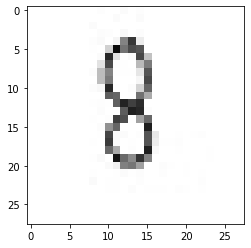

In [45]:
import matplotlib.pyplot as plt
test = plt.imread('C:/Users/gogi/Desktop/8.jpg')
plt.imshow(test)

In [47]:
test = test.reshape(3,28*28)

In [48]:
network.predict(test)

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (28, 28, 3)